In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import os
import seaborn as sns

In [9]:
number_of_hosts = []  # Declaring a global list, but should ideally not be used globally.
hosts = []
df = None
dataset = []

In [10]:
def set_hostnames(number_of_hosts: int) -> None:
    global hosts
    hostnames_prefix = ['L'] * 40 + ['S'] * 30 + ['A'] * 20 + ['H'] * 10
    entorno = ['D'] * 10 + ['I'] * 10 + ['T'] * 25 + ['S'] * 25 + ['P'] * 30
    pais = ['NOR'] * 6 + ['FRA'] * 9 + ['ITA'] * 16 + ['ESP'] * 16 + ['GER'] * 23 + ['IRL'] * 30
    grupo_alpha = []

    node_counter = {}

    for i in range(number_of_hosts):
        # Generar componentes directamente
        host = random.choice(hostnames_prefix) + random.choice(entorno) + random.choice(pais)
        
        # Incrementar el contador o inicializarlo para la combinación actual
        if host not in node_counter:
            node_counter[host] = 1
        else:
            node_counter[host] += 1

        # Generar número incremental con tres dígitos
        host += str(node_counter[host]).zfill(3)
        hosts.append(host)
        

In [11]:
def get_os(hostname: str) -> str:
    if hostname[0] == 'L':
        return 'Linux'
    elif hostname[0] == 'S':
        return 'Solaris'
    elif hostname[0] == 'A':
        return 'AIX'
    elif hostname[0] == 'H':
        return 'HP-UX'
    else:
        return 'Unknown'

In [12]:
def get_enviroment(hostname: str) -> str:
    if hostname[1] == 'D':
        return 'Development'
    elif hostname[1] == 'I':
        return 'Integration'
    elif hostname[1] == 'T':
        return 'Testing'
    elif hostname[1] == 'S':
        return 'Staging'
    elif hostname[1] == 'P':
        return 'Production'
    else:
        return 'Unknown'
        

In [13]:
def get_country(hostname: str) -> str:
    country_code = hostname[2:5]  # Slice correctly for country code
    if country_code == 'GER':
        return 'Germany'
    elif country_code == 'ITA':
        return 'Italy'
    elif country_code == 'ESP':
        return 'Spain'
    elif country_code == 'IRL':
        return 'Ireland'
    elif country_code == 'NOR':
        return 'Norway'
    elif country_code == 'FRA':
        return 'France'
    else:
        return 'Unknown'

In [14]:
def set_dataframe(count: int) -> None:
    global df,dataset
    set_hostnames(count)

    dataset = []
    
    for hostname in hosts:
        dataset.append({
            'Código': hostname,
            'Hostname': get_os(hostname),
            'Entorno': get_enviroment(hostname),
            'Pais': get_country(hostname),
            'Número': int(hostname[-3:])  # Extraer el número del nodo al final del hostname
        })

    df = pd.DataFrame(dataset)  # Convert dataset to DataFrame



In [15]:
set_dataframe(1500)

In [16]:
print (df.head(10))

     Código Hostname      Entorno     Pais  Número
0  APNOR001      AIX   Production   Norway       1
1  SPFRA001  Solaris   Production   France       1
2  HPITA001    HP-UX   Production    Italy       1
3  SSGER001  Solaris      Staging  Germany       1
4  SSITA001  Solaris      Staging    Italy       1
5  SPGER001  Solaris   Production  Germany       1
6  LIITA001    Linux  Integration    Italy       1
7  STESP001  Solaris      Testing    Spain       1
8  STIRL001  Solaris      Testing  Ireland       1
9  LDESP001    Linux  Development    Spain       1


In [10]:
import os

#Metí una función diferente para el file hosts.cvs porque no aceptaba la ruta de mi file en jupyter.
# Verificar si el directorio existe, si no, crearlo
directory = "Complu/Phy avanzado"
if not os.path.exists(directory):
    os.makedirs(directory)

df.to_csv(f"{directory}/hosts.csv", index=False, header=True)

# Leer el archivo CSV generado y almacenarlo en un nuevo DataFrame
hosts_df = pd.read_csv(f"{directory}/hosts.csv")

print(hosts_df.head(50))

      Código Hostname      Entorno     Pais  Número
0   APIRL001      AIX   Production  Ireland       1
1   SPITA001  Solaris   Production    Italy       1
2   LPESP001    Linux   Production    Spain       1
3   APITA001      AIX   Production    Italy       1
4   ATIRL001      AIX      Testing  Ireland       1
5   LSIRL001    Linux      Staging  Ireland       1
6   SSESP001  Solaris      Staging    Spain       1
7   LSFRA001    Linux      Staging   France       1
8   LTFRA001    Linux      Testing   France       1
9   LSIRL002    Linux      Staging  Ireland       2
10  ASITA001      AIX      Staging    Italy       1
11  STESP001  Solaris      Testing    Spain       1
12  LTNOR001    Linux      Testing   Norway       1
13  SSGER001  Solaris      Staging  Germany       1
14  SDIRL001  Solaris  Development  Ireland       1
15  SSITA001  Solaris      Staging    Italy       1
16  ATGER001      AIX      Testing  Germany       1
17  HPITA001    HP-UX   Production    Italy       1
18  ASESP001

In [11]:
h = hosts_df

h_countries_dev = h.groupby(['Pais', 'Entorno']).size()

h_countries_dev


Pais     Entorno    
France   Development      7
         Integration     21
         Production      46
         Staging         31
         Testing         30
Germany  Development     38
         Integration     28
         Production      97
         Staging         90
         Testing         74
Ireland  Development     38
         Integration     43
         Production     139
         Staging        121
         Testing        108
Italy    Development     21
         Integration     34
         Production      86
         Staging         59
         Testing         52
Norway   Development      5
         Integration      9
         Production      21
         Staging         28
         Testing         24
Spain    Development     27
         Integration     24
         Production      67
         Staging         70
         Testing         62
dtype: int64

In [12]:
h_countries_dev.unstack()

Entorno,Development,Integration,Production,Staging,Testing
Pais,,,,,
France,7,21,46,31,30
Germany,38,28,97,90,74
Ireland,38,43,139,121,108
Italy,21,34,86,59,52
Norway,5,9,21,28,24
Spain,27,24,67,70,62


<Axes: xlabel='Pais'>

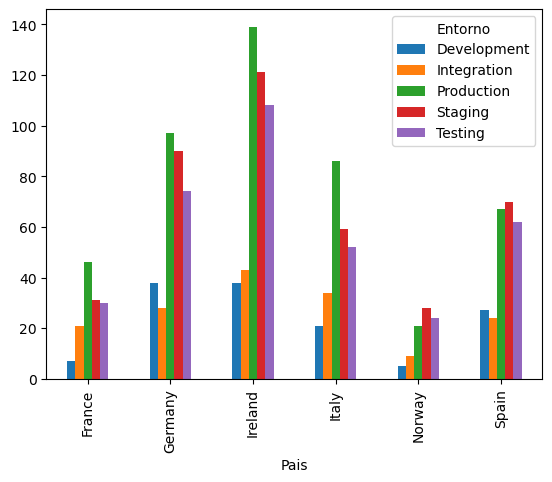

In [13]:
h_countries_dev.unstack().plot(kind = 'bar')

In [14]:
h = hosts_df

h_countries_host = h.groupby(['Hostname','Pais']).size()

h_countries_host




Hostname  Pais   
AIX       France      16
          Germany     71
          Ireland     61
          Italy       61
          Norway      18
          Spain       45
HP-UX     France      15
          Germany     28
          Ireland     67
          Italy       24
          Norway       4
          Spain       17
Linux     France      65
          Germany    133
          Ireland    189
          Italy       93
          Norway      35
          Spain      113
Solaris   France      39
          Germany     95
          Ireland    132
          Italy       74
          Norway      30
          Spain       75
dtype: int64

In [18]:
#Variables para plots

#Plt1
h_countries_host = h.groupby(['Hostname','Pais']).size()
h_countries_host_unstacked = h_countries_host.unstack()

#Plt2
h_hostnames = h.groupby(['Hostname']).size()
num_hosts = h['Hostname'].value_counts()

#Plt3
h_countries_counts = h['Pais'].value_counts()
palette = sns.color_palette("coolwarm", len(h_countries_counts))
plt3 = h_countries_counts.max

#Plt4
h_dev_countries = h.groupby(['Pais', "Entorno"]).size()
h_dev_countries_unstacked = h_dev_countries.unstack(0)


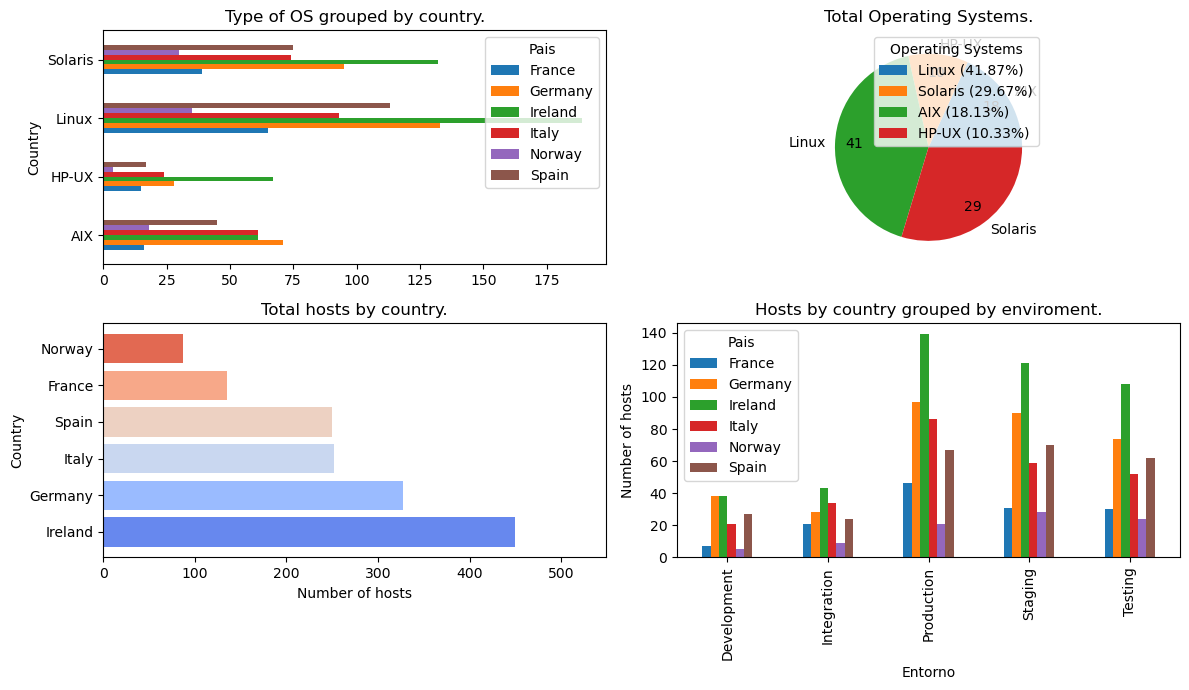

In [20]:
fig, axes = plt.subplots(2, 2, figsize=(12, 7))

#Plt1
h_countries_host = h.groupby(['Hostname','Pais']).size()
h_countries_host_unstacked = h_countries_host.unstack()

h_countries_host_unstacked.plot(kind = 'barh', ax=axes[0,0])

axes[0,0].set_title("Type of OS grouped by country.")
axes[0,0].set_ylabel("Country")

#Plt2
h_hostnames = h.groupby(['Hostname']).size()
num_hosts = h['Hostname'].value_counts()

h_hostnames.plot(kind = 'pie', ax=axes[0,1], autopct='%d', pctdistance=0.8,)

axes[0,1].set_title("Total Operating Systems.")
axes[0, 1].legend(
    labels=[f"{os} ({p:.2f}%)" for os, p in zip(num_hosts.index, 100 * num_hosts / num_hosts.sum())],
    loc="upper right",
    title="Operating Systems"
)

#Plt3
h_countries_counts = h['Pais'].value_counts()

# Obtener los colores de la paleta de seaborn
palette = sns.color_palette("coolwarm", len(h_countries_counts))

# Crear el gráfico de barras horizontal usando matplotlib pero con la paleta de seaborn
axes[1, 0].barh(h_countries_counts.index, h_countries_counts.values, color=palette)

axes[1, 0].set_title("Total hosts by country.")
axes[1, 0].set_ylabel("Country")
axes[1, 0].set_xlabel("Number of hosts")
axes[1, 0].set_xlim(0, plt3+100)

#Plt4
h_dev_countries = h.groupby(['Pais', "Entorno"]).size()
h_dev_countries_unstacked = h_dev_countries.unstack(0)

h_dev_countries_unstacked.plot(kind = 'bar', ax=axes[1,1])

axes[1,1].set_title("Hosts by country grouped by enviroment.")
axes[1,1].set_ylabel("Number of hosts")
fig.tight_layout()
plt.show()

